<a href="https://colab.research.google.com/github/manuelcalcada/puc-data-science-for-bpm/blob/master/health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

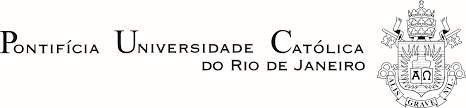

#Previsão de proprietários de seguros de saúde que estarão interessados também ​​em seguros de veículos

**IND2074** - Ciência de Dados para Processos de Negócio | 2020.2

---

## Índice

0. Problema de negócio
1. Instalação e importação das bibliotecas necessárias
2. Dados (Coleta e caracterização)
3. Pré-processamento
4. Treinamento dos modelos de machine learning
5. Pós-processamento
6. Conclusões

## 0. Problema de negócio

### 0.1 Introdução

**Área**: 

Mercado de seguros


**Motivação**: 

A receita de vendas de determinada seguradora está em queda. Visto este cenário, ela precisa planejar uma estratégia de comunicação para oferecer o produto de seguro automotivo para a sua carteira de clientes.

Construir um modelo para prever se um cliente estaria interessado em seguro de veículos é extremamente útil para a empresa porque ela pode então planejar sua estratégia de comunicação para chegar a esses clientes e otimizar seu modelo de negócios e receita.

**Objetivo principal**: 

Construir um modelo de machine learning que busque prever se os segurados de saúde do ano anterior também teriam interesse no seguro automotivo. 


**Contexto**:

1. Uma apólice de seguro é um acordo pelo qual uma empresa se compromete a fornecer uma garantia de compensação por perdas, danos, doenças ou morte especificados em troca do pagamento de um prêmio especificado; 
2. Um prêmio é uma quantia em dinheiro que o cliente precisa pagar regularmente a uma seguradora por essa garantia;
3. Para prever se o cliente estaria interessado em seguro de veículos, tem-se informações sobre dados demográficos (sexo, idade, tipo de código de região), veículos (idade do veículo, danos), política (premium, canal de sourcing) etc.

Dataset utilizado: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

### 0.2 Estratégia

**Entrada(s)**:
1. Problema de negócio;
2. Conjunto de dados com 381 mil informações de clientes segurados

**Saída(s)**:
1. Modelo de machine learning treinado

**Estratégia**:
1. Coletar os dados
2. Limpeza dos dados
    
    2.1. Dados estão dentro do escopo de negócio?
    
    2.2. Dados faltantes?
    
    2.3. Outliers?
3. Feature engineering
4. Preparar as features
    
    4.1. Encoder das variáveis categóricas
    
    4.2. Binarização
5. Treinar o modelo
    
    5.1. KNN
    
    5.2. Decision Three
    
    5.3. Random Forest
6. Calcular a performance do modelo
7. Entregar o modelo treinado

## 1. Instalação e importação das bibliotecas necessárias

In [47]:
!pip install scikit-learn --upgrade; #instala o scikit learn
!pip install imblearn --upgrade; #instala o imblearn
!pip install seaborn --upgrade; #instala o seaborn
!pip install smote-variants --upgrade; #instala o smote-variants
!pip install pycaret # Instalar PyCaret

     |████████████████████████████████| 6.8MB 7.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Requirement already up-to-date: imblearn in /usr/local/lib/python3.6/dist-packages (0.0)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)
     |████████████████████████████████| 143kB 8.8MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=555270670acee2394baefa5d00c7e956130cf33ff3d1079e27d59692767983c4
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=906487958e896f4f4381d1c0d561213338d372d2bebd0f1ada72a552fb69cffe
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built statistics minisom
     |████████████████████████████████| 256kB 8.1MB/s 
     |████████████████████████████████| 266kB 20.6MB/s 
     |████████████████████████████████| 13.9MB 330kB/s 
     |████████████████████████████

In [2]:
#importa os pacotes e funções necessárias
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import seaborn as sn
sn.set_palette("pastel")
sn.set_theme(style='white')

## 2. Dados (Coleta e caracterização) 

In [3]:
#importa o dataset do github e grava na variável df_0
df_0 = pd.read_csv('https://raw.githubusercontent.com/manuelcalcada/data-science-for-BPM/master/train.csv')

In [4]:
#imprime as 10 primeiras linhas do dataset
df_0.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
df = df_0.copy() #criando backup de df_0

### 2.1 Caracterização dos dados

In [6]:
print('O número de linhas e de colunas no dataset respectivamente é: \n')
df.shape

O número de linhas e de colunas no dataset respectivamente é: 



(381109, 12)

In [7]:
#exibindo as informações do dataset como colunas, tipos e quantidade de dados
print('As colunas do dataset, jutamente com o seu tipo e quantidade de dados são: \n')

format(df.info())

As colunas do dataset, jutamente com o seu tipo e quantidade de dados são: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


'None'

**Atributos**:

| Atributo | Definição |
| --- | --- |
|id | Identificador do cliente (único) |
|Gender | Sexo do cliente |
|Age | Idade do cliente |
|Driving_License | 0: Cliente não possui licença para dirigir - 1: Cliente possui licença para dirigir |
|Region_Code | Código único para região do cliente |
|Previosly_Insured | 0: Cliente não possui seguro automóvel - 1: Cliente já possui seguro automóvel |
|Vehicle_Age | Idade do veículo |
|Vehicle_Damage | 0: Cliente já se envolveu em sinistros - 1: Cliente nunca se envolveu em sinistros |
|Annual_Premium | Valor do prêmio anual pago pelo cliente |
|Policy_Sales_Channel | Código contento o meio de contato com o cliente (Correio, telefone, e-mail, pessoalmente...) |
|Vintage | Número de dias que o cliente esteve associado à empresa|
|Response | 0: Cliente não está interessado no seguro automóvel - 1: Cliente está interessado |

In [8]:
#exibindo a quantidade de valores únicos nos dados
print("Valores únicos no df: \n\n{}\n".format(df.nunique()))

Valores únicos no df: 

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64



In [9]:
#exibindo os dados ausentes do conjunto de dados
print("Valores nulos no df: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos no df: 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64



Como pode ser visto acima:


1.   Existem 12 características (colunas) no *dataset* com 381109 observações (linhas);
2.   Não há valores nulos em nenhuma coluna.



### 2.2 Entendendo o comportamento das variáveis

Após a caracterização dos dados e pelo entendimento do problema de negócio, criam-se as seguintes **hipóteses** com relação a contratação de seguros automotivos:

1. A maior idade do veículo afeta diretamente a propensão à contratação de seguro automotivo;
2. O maior valor do prêmio afeta diretamente a propensão à contratação de seguro automotivo; 
3. A maior idade do proprietário afeta diretamente a propensão à contratação de seguro automotivo;
4. Mulheres tendem a contratar mais seguros automotivos, em proporção, do que homens; 
5. Os dias segurados com a seguradora de saúde fazem a intenção de contratação do seguro automotivo aumentar;
6. O envolvimento anterior em acidentes com veículos aumenta a intenção de contratação do seguro automotivo;
7. Proprietários que não tem habilitação não estão interessados na contratação de seguro automotivo;
8. A existência de seguro prévio diminui a propensão à contratação de seguro automotivo.

Serão investigadas essas relações através de histogramas, gráficos de dispersão e de matriz de correlação. 

In [10]:
#obtendo estatísticas acerca das colunas Age, Annual_Premium e Vintage
statistics = df[['Age', 'Annual_Premium', 'Vintage']].describe()

print('Algumas estatísticas das variáveis numéricas Idade, Prêmio e Dias segurados: \n')
statistics.head(10)

Algumas estatísticas das variáveis numéricas Idade, Prêmio e Dias segurados: 



,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [11]:
#obtendo a quantidade de valores pertencentes a classes dummy Driving_License
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [12]:
#frequência dos valores acima
df['Driving_License'].value_counts(normalize = True) *100

1    99.786938
0     0.213062
Name: Driving_License, dtype: float64

De todas os clientes, somente 812 (0,2%) não possuem licença para dirigir, enquanto que 380297 (99,8%) segurados a possuem. 
Obviamente, é esperado que essa variável (*Driving_License*) seja muito importante para a escolha do cliente também efetuar um seguro de automóvel.

In [13]:
#obtendo a quantidade de valores pertencentes a classes dummy Previously_Insured
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [14]:
#frequência dos valores acima
df['Previously_Insured'].value_counts(normalize = True) *100

0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64

Para esta característica, os dados se apresentam de forma balanceada, com quase 46% dos respondentes tendo efetuado seguro de veículo anteriormente e 54% não tendo efetuado a contratação anteriormente.


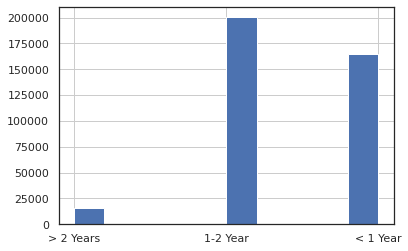

In [15]:
#obtendo a quantidade de valores pertencentes a classes categorica Vehicle_Age
df['Vehicle_Age'].hist();

Para a variável categórica da idade do carro, 52% dos clientes possuem um veículo com idade entre 1 e 2 anos, 43% possuem veículos mais novos que 1 ano enquanto que uma minoria possui veículos com mais de 2 anos de produção. 

In [16]:
#obtendo a quantidade de valores pertencentes a cada classe alvo
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [17]:
#frequência dos valores acima
df['Response'].value_counts(normalize = True) *100

0    87.743664
1    12.256336
Name: Response, dtype: float64

É possível verificar que o conjunto de dados utilizado é extremamente desbalanceado, tendo mais de 87% dos respondentes sem intenção de efetuar a contratação de seguros de veículo, enquanto que por volta de 12% possuem. 

#### 2.2.1 Histogramas simples

##### 2.2.1.1 Distribuição de idade

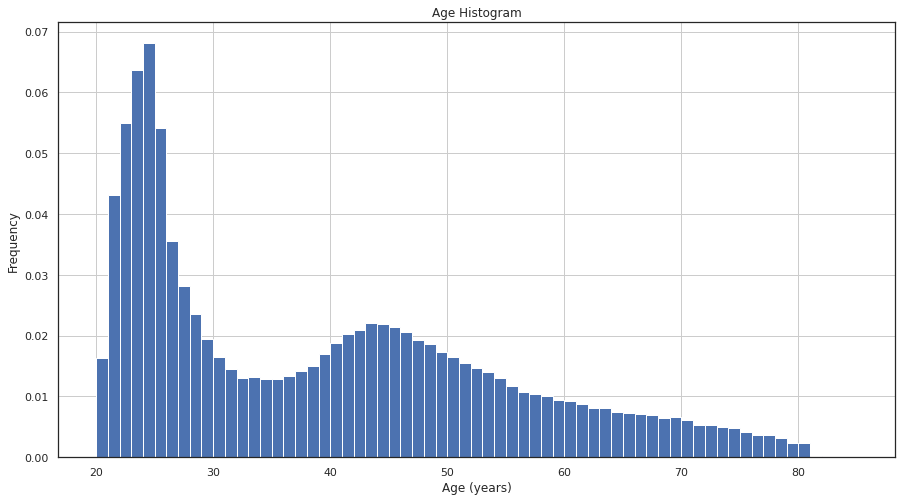

In [18]:
#histograma da distribuição dos dados da variável numérica Age
df['Age'].hist(figsize=(15,8), bins = 65, density = True)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

In [19]:
df['Age'].value_counts(normalize = True, bins = 10)

(19.933999999999997, 26.5]    0.335967
(39.5, 46.0]                  0.146328
(26.5, 33.0]                  0.128417
(46.0, 52.5]                  0.101931
(33.0, 39.5]                  0.085212
(52.5, 59.0]                  0.079416
(59.0, 65.5]                  0.049078
(65.5, 72.0]                  0.043961
(72.0, 78.5]                  0.024565
(78.5, 85.0]                  0.005125
Name: Age, dtype: float64

**Conclusão**

É possivel verificar que predominam clientes entre 21 e 30 anos (por volta de 40%), com a faixa entre 40 e 50 anos sendo a segunda mais numerosa com quase 24% dos clientes. 

##### 2.2.1.2 Distribuição do prêmio anual

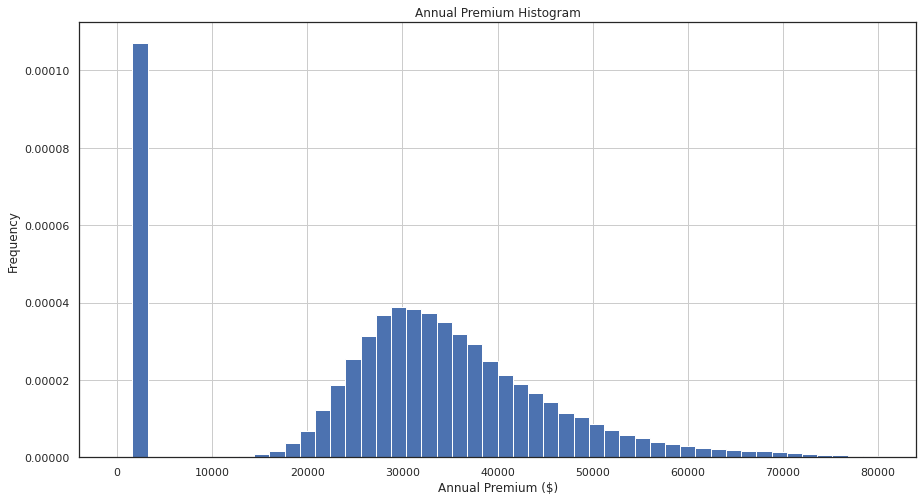

In [20]:
#histograma da distribuição dos dados da variável numérica Annual_Premium
df['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.title('Annual Premium Histogram')
plt.show()

**Conclusão**

Os prêmios anuais estão mais concentrados entre 24000 dólares e 56000 dólares, faixa que contem quase 70% das observações.
Existe uma frequência considerável de clientes que aderiram ao valor mínimo possível para o prêmio, que é de 2630 dólares anuais. 

##### 2.2.1.3 Distribuição dos dias segurados

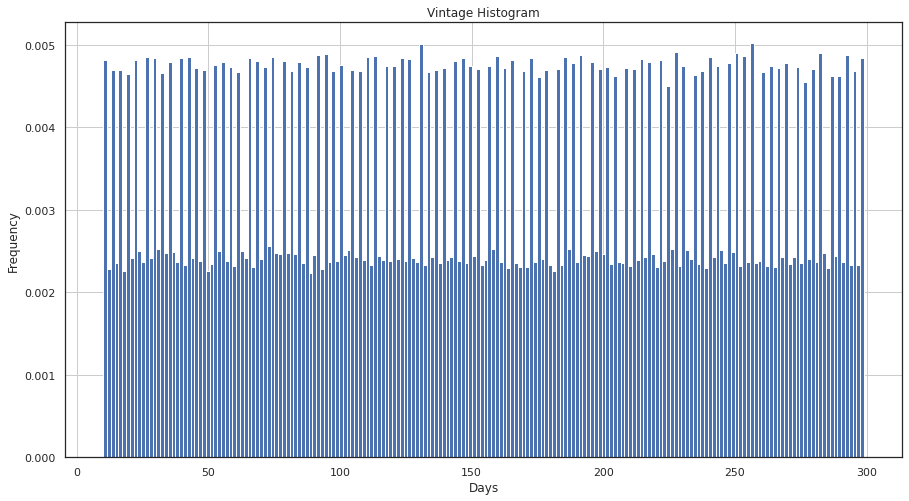

In [21]:
#histograma da distribuição dos dados da variável numérica Vintage
df['Vintage'].hist(figsize=(15,8), bins = 200, density = True)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Vintage Histogram')
plt.show()

**Conclusão**

O histograma da variável *Vintage* apresenta comportamento constante, sendo assim não parece ser uma característica definidora para o nosso problema.

#### 2.2.2 Histogramas compostos




##### 2.2.2.1 Idade x Intenção de contratação do seguro de automóvel


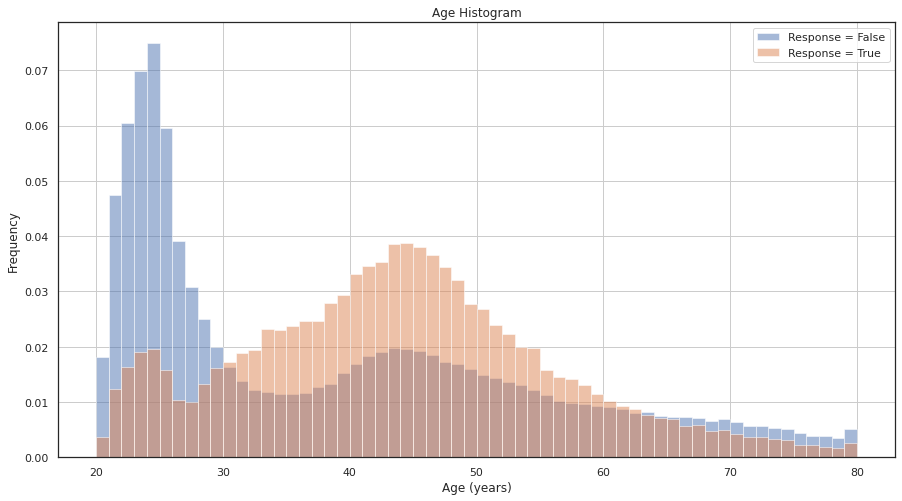

In [22]:
#histograma de Age agrupado pela classe
df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = False', 'Response = True'])
plt.show()

In [23]:
df.groupby('Response').Age.value_counts(normalize = True, bins = 10)

Response                            
0         (19.933999999999997, 26.5]    0.369346
          (39.5, 46.0]                  0.131140
          (26.5, 33.0]                  0.129833
          (46.0, 52.5]                  0.092784
          (33.0, 39.5]                  0.075661
          (52.5, 59.0]                  0.075311
          (59.0, 65.5]                  0.048968
          (65.5, 72.0]                  0.045526
          (72.0, 78.5]                  0.025963
          (78.5, 85.0]                  0.005467
1         (38.9, 45.2]                  0.247955
          (45.2, 51.5]                  0.181696
          (32.6, 38.9]                  0.147377
          (51.5, 57.8]                  0.106508
          (19.936, 26.3]                0.097003
          (26.3, 32.6]                  0.095055
          (57.8, 64.1]                  0.067459
          (64.1, 70.4]                  0.032413
          (70.4, 76.7]                  0.018347
          (76.7, 83.0]          

**Conclusão**

A partir dos valores acima, é possível inferir que quase metade dos clientes que não tem interesse pelo seguro de automóvel possuem menos de 30 anos, enquanto que, entre os que tem interesse nesta modalidade de seguro, o grupo majoritário está na faixa entre 40 e 50 anos. 

Esses resultados estão alinhados com a hipótese inicial de que os clientes ficam mais conservadores a medida que a idade aumenta, sendo assim, esta característica parece influenciar fortemente na decisão da contratação do seguro. 

**Confirmada a H3**.

##### 2.2.2.2 Valor do prêmio anual x Intenção de contratação do seguro de automóvel


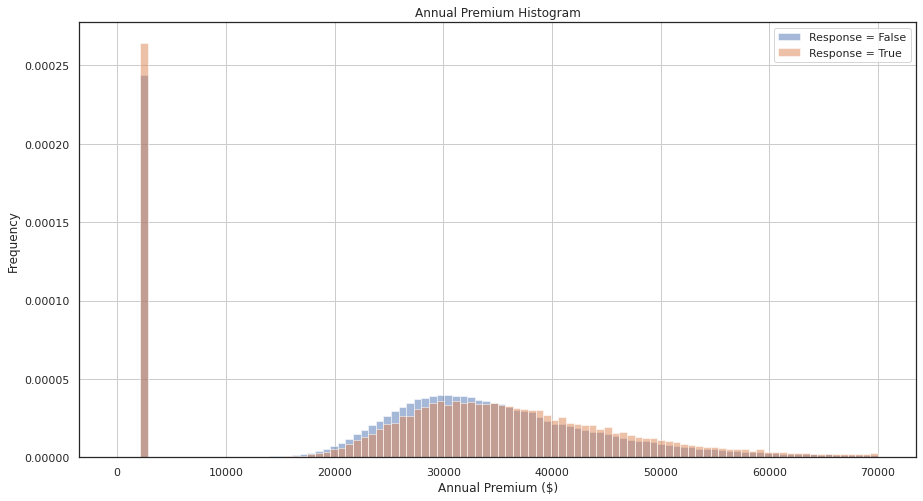

In [24]:
#histograma de Annual Premium agrupado pela classe
df.groupby('Response').Annual_Premium.hist(range=[0, 70000], align = 'mid', bins=100, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.title('Annual Premium Histogram')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Observam-se que os diversos valores de prêmio anual têm proporções bastante similares nos dois grupos da classificação, isto é, os clientes que possuem interesse em realizar o seguro e os que não o possuem.

Sendo assim, esta característica não parece ser uma boa candidata para a classificação de intenção dos clientes segurados em aderirem ao seguro automóvel. 

**Não é possível confirmar a H2**.


##### 2.2.2.3 Gênero x Intenção de contratação do seguro de automóvel


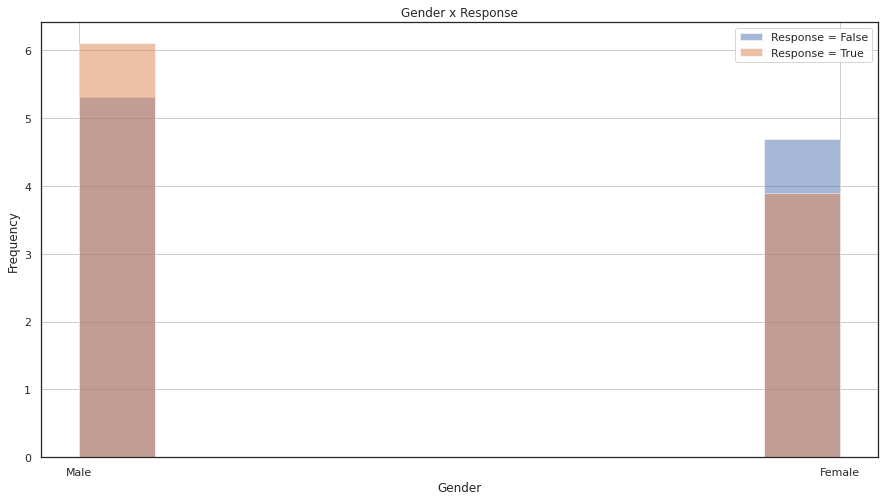

In [25]:
#Relação entre Gênero e intenção de contratar o seguro de automóvel
df.groupby('Response').Gender.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Contratação**

No conjunto de dados, parece haver uma tendência maior da intenção de contratação do seguro automotivo ser positiva conforme o respondente é homem.

**Não é possível confirmar a H4**, na verdade o oposto é observado.


##### 2.2.2.4 Danos anteriores ao veículo x Intenção de contratação do seguro de automóvel


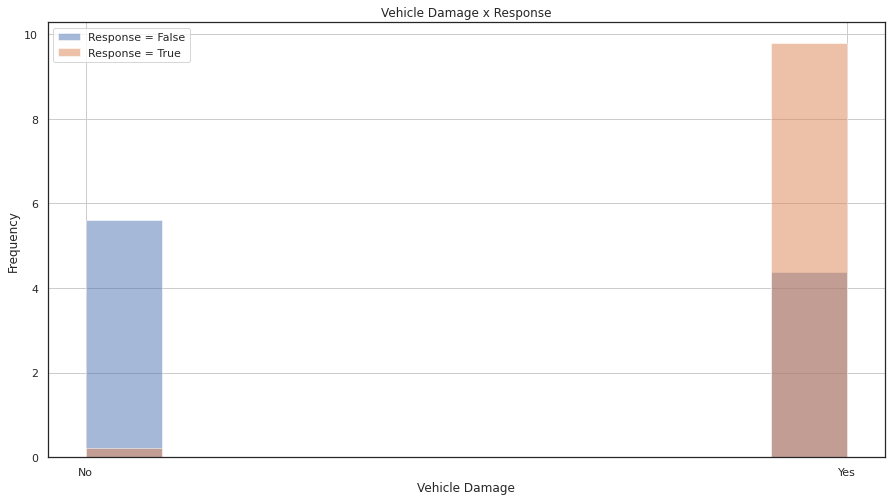

In [26]:
#Relação entre Danos no veículo e intenção de contratar o seguro de automóvel
df.groupby('Response').Vehicle_Damage.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Vehicle Damage')
plt.ylabel('Frequency')
plt.title('Vehicle Damage x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Parece haver uma forte tendência positiva na contratação de seguros automotivos se o veículo do segurado sofreu algum sinistro no passado. 

**Confirmada a H6**.


##### 2.2.2.5 Idade do veículo x Intenção de contratação do seguro de automóvel


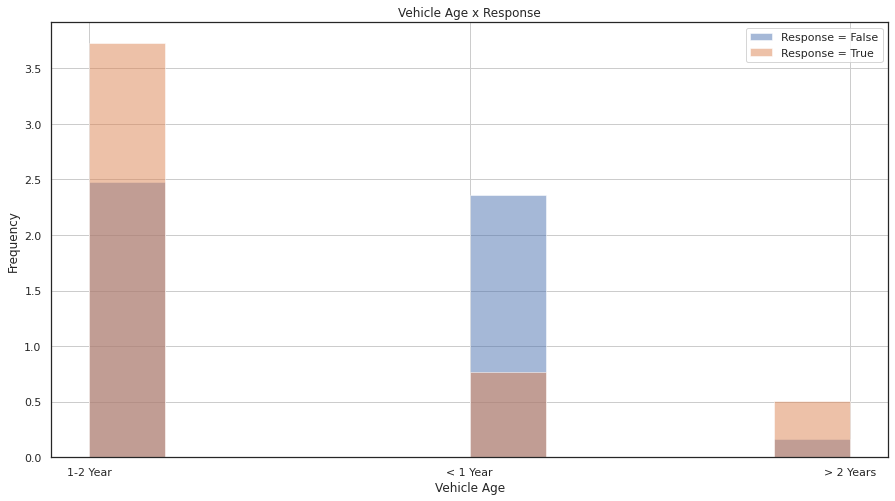

In [27]:
#Relação entre idade do veículo e intenção de contratar o seguro de automóvel
df.groupby('Response').Vehicle_Age.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.title('Vehicle Age x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Pelo gráfico da distribuição, parece ser mais frequente a intenção de contratação de seguros automotivos quando os segurados possuem veículos com mais de 1 ano de idade. 

Inclusive, apesar da amostra pequena de veículos com mais de 2 anos de idade, a intenção de contratação nessa faixa superou a de não-contratação. 

**Confirmada a H1**.

**É necessário investigar a relação de veículos novos com outras variáveis** para entender a baixa frequência de intenção de contratação para carros com menos de 1 ano. As variáveis que podem explicar essa tendência, escolhidas pois parecem ser as mais relevantes para a definição da intenção de contratação do seguro automotivo, são: 
1. Existência anterior de seguro; 
2. danos anteriores.

###### 2.2.2.5.1 Idade do veículo x Existência anterior de seguro


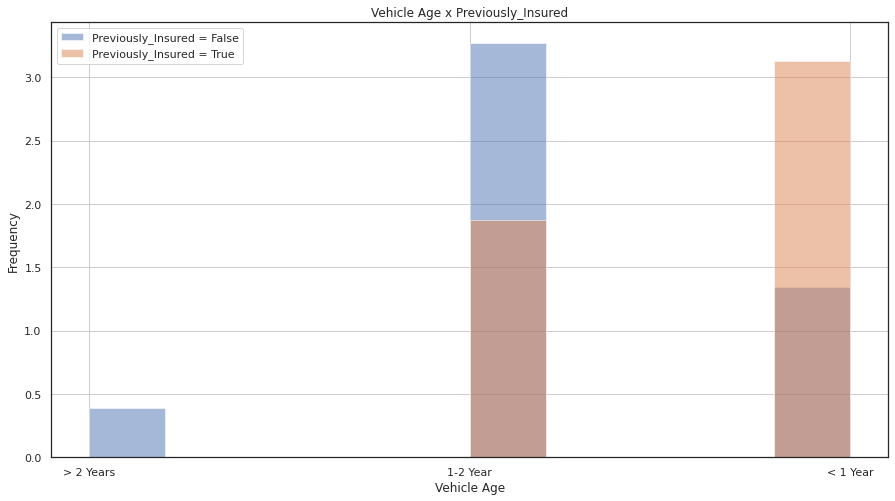

In [28]:
#Relação entre idade do veículo e existencia anterior de seguro
df.groupby('Previously_Insured').Vehicle_Age.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.title('Vehicle Age x Previously_Insured')
plt.legend(['Previously_Insured = False', 'Previously_Insured = True'])
plt.show()

**Conclusão** 

Proprietários de veículos novos (com idade menor do que 1 ano), já possuem seguro prévio, o que pode explicar a menor intenção de contratação deste grupo.

###### 2.2.2.5.2 Idade do veículo x Danos anteriores ao veículo


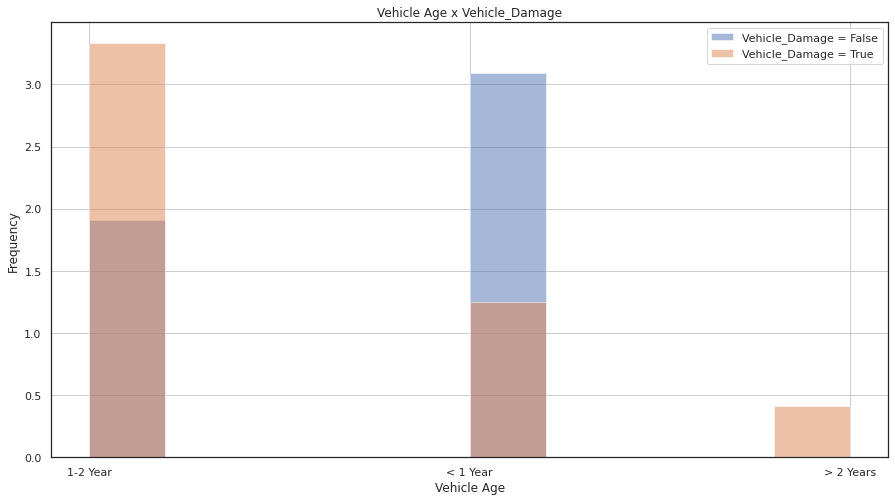

In [29]:
#Relação entre idade do veículo e danos anteriores ao veículo
df.groupby('Vehicle_Damage').Vehicle_Age.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.title('Vehicle Age x Vehicle_Damage')
plt.legend(['Vehicle_Damage = False', 'Vehicle_Damage = True'])
plt.show()

**Conclusão** 

Proprietários de veículos novos (com idade menor do que 1 ano), proporcionalmente sofreram menos com danos ao veícvulos em decorrência de acidentes anteriores, o que também pode explicar a menor intenção de contratação deste grupo. 

##### 2.2.2.6 Habilitação x Intenção de contratação do seguro de automóvel


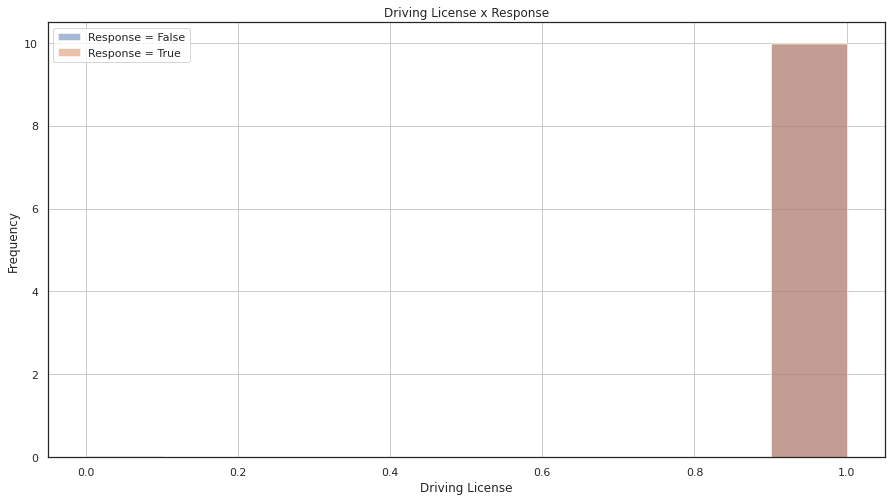

In [30]:
#Relação entre o cliente possuir habilitação e intenção de contratar o seguro de automóvel
df.groupby('Response').Driving_License.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Driving License')
plt.ylabel('Frequency')
plt.title('Driving License x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Como esperado, clientes sem veículos provavelmente não estão interessados em um seguro de automóvel.

**Confirmada a H7**.


##### 2.2.2.7 Dias segurados x Intenção de contratação do seguro de automóvel


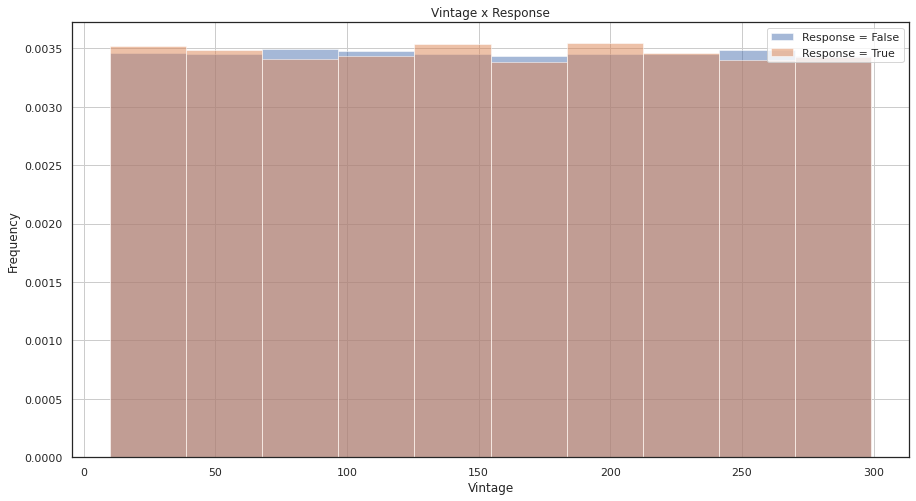

In [31]:
#Relação entre os dias segurados e intenção de contratar o seguro de automóvel
df.groupby('Response').Vintage.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('Vintage x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Esta característica não parece ser útil ao modelo visto não fornecer nenhuma informação relevante à classificação de intenção de contratação.

**Não é possível confirmar a H5**.


##### 2.2.2.8 Seguro prévio x Intenção de contratação do seguro de automóvel


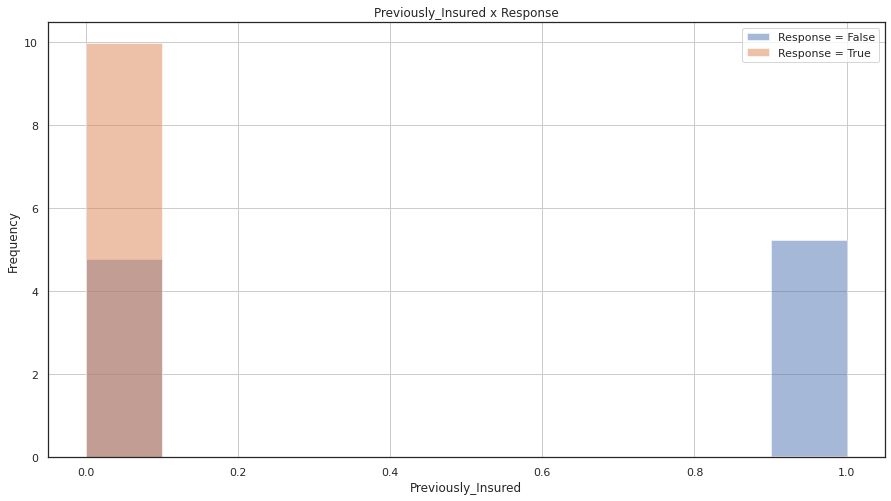

In [32]:
#Relação entre ter um seguro de automóvel já contratado e intenção de contratar o seguro de automóvel
df.groupby('Response').Previously_Insured.hist(figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Previously_Insured')
plt.ylabel('Frequency')
plt.title('Previously_Insured x Response')
plt.legend(['Response = False', 'Response = True'])
plt.show()

**Conclusão**

Os respondentes que demonstraram interesse na contratação de seguro de automóvel não o possuem atualmente. 

**Confirmada a H8**.


#### 2.2.3 Correlação entre as variáveis





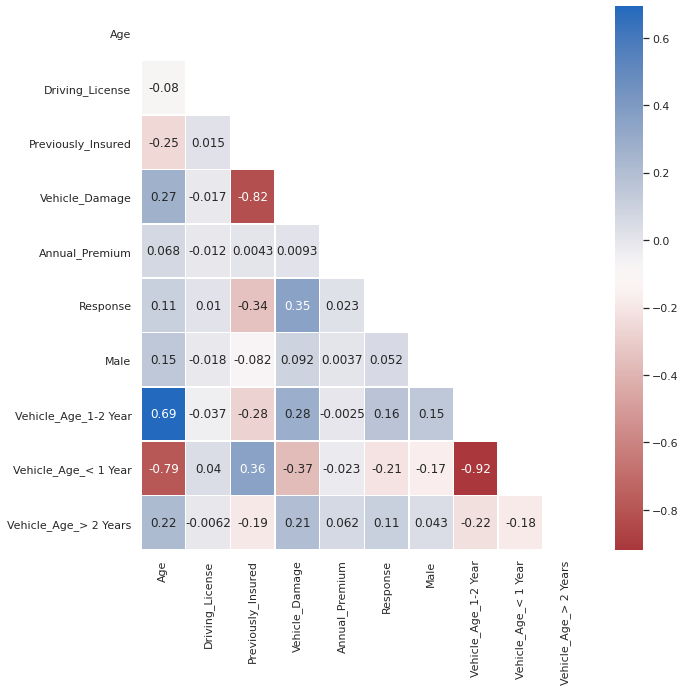

In [48]:
#matriz de correlação entre as variáveis (excluindo as categóricas)
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sn.heatmap(corrMatrix, annot=True, cmap="vlag_r", linewidths=0.5, linecolor='white', mask=mask)
plt.show()

**Conclusão**

As correlações entre as variáveis são, em geral, baixas, indicado a baixa multicolinearidade entre as variáveis. 

A maior correlação ocorreu entre **Age e Response** (0,11) e a menor correlação ocorreu entre Annual_Premium e response (-0,34), o que está em linha com as observações anteriores dos histogramas compostos. 

As demais correlações (com a variável **Response**) estão em linha com os achados anteriores. 


#### 2.2.4 Detecção de *outliers*


Neste trabalho, a detecção de possíveis outliers será feita somente através da visualização de boxplot. 

Nas análises anteriores, **não foram detectados possíveis outliers em respeito às regras de negócio** nos valores do conjunto de dados.

##### 2.2.4.1 Idade


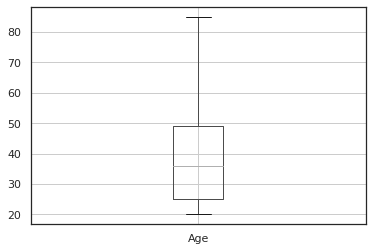

In [34]:
df.boxplot(column=['Age']);

**Conclusão**

Não há candidatos à outliers na distribuição das idades dos clientes.

##### 2.2.4.2 Prêmio anual


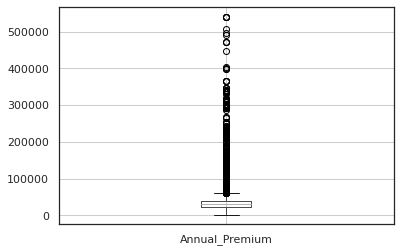

In [35]:
df.boxplot(column=['Annual_Premium']);

**Conclusão**

Existem muitos candidatos à outliers na distribuição dos prêmios anuais. Isto não parece ser um problema no nosso caso pois, analisando sob as regras de negócio, os valores dos prêmios são plausíveis para a modalidade de saúde. 

#### 2.2.5 Relação entre variáveis numéricas (dispersão)


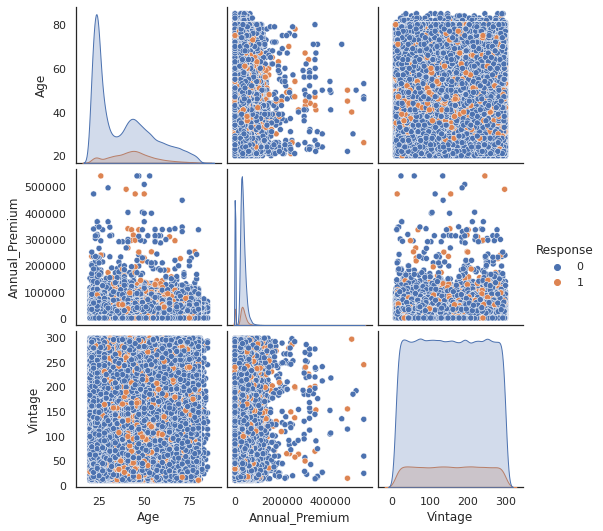

In [36]:
sn.pairplot(df[['Age', 'Annual_Premium', 'Vintage' , 'Response']], hue="Response");

**Conclusão**

Não é possível classificar linearmente a intenção de contratação do seguro de automóvel utilizando as variáveis numéricas ou traçar relações entre as variáveis conforme pode ser observado com os gráficos de dispersão exibidos anteriormente. 

## 3. Pré-processamento dos dados

No pré-processamento dos dados, será feita a remoção de algumas colunas que não parecem adicionar informações relevantes ao treinamento do modelo, assim como será feito a binarização e o encoding de variáveis categóricas. 

### 3.1. Removendo colunas

Remoção de colunas que não parecem adicionar informações relevantes para o modelo.

In [37]:
#Removendo colunas
df = df.drop(['id', 'Vintage', 'Policy_Sales_Channel', 'Region_Code'], axis=1)

### 3.2. Binarização

Binarização das variáveis Vehicle_Damage, Gender e Vehicle_Age

In [38]:
#Binarizando a variável Vehicle_Damage
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [39]:
#Binarizando a variável Gender
df['Male'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = df.drop(['Gender'], axis=1)

#### 3.2.1 Encoding

In [40]:
#One-hot-encoding em Vehicle_Age
df = pd.get_dummies(df, columns=['Vehicle_Age'])

In [41]:
#backup do dataframe
df1 = df.copy()
df1.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Response,Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,0,1,40454.0,1,1,0,0,1
1,76,1,0,0,33536.0,0,1,1,0,0
2,47,1,0,1,38294.0,1,1,0,0,1
3,21,1,1,0,28619.0,0,1,0,1,0
4,29,1,1,0,27496.0,0,0,0,1,0


### 3.3. Normalização

A coluna dos valores dos prêmios anuais possuem valores muito maiores em relação às demais, principalmente às binárias. Sendo assim, é necessário um processo de normalização. 

In [42]:
#Colunas do dataframe
df1.columns

Index(['Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Response', 'Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [43]:
#Definindo os atributos para treinamento
features = df1[
    [
      'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'
    ]
]
target = df1['Response']

In [44]:
#Normalizando a base
from sklearn import preprocessing #importando a função necessária

mm_scaler = preprocessing.MinMaxScaler()
features = mm_scaler.fit_transform(features)
#mm_scaler.transform(X_test)

### 3.4. Divisão entre treino e teste

70% dos dados serão utilizados para o treino (com posterior validação cruzada de k=5) e 30% para os testes. 

In [50]:
import random
random.seed(10000)

In [53]:
#Dividindo conjunto em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (266776, 9)
Number transactions y_train dataset:  (266776,)
Number transactions X_test dataset:  (114333, 9)
Number transactions y_test dataset:  (114333,)


### 3.5. Balanceamento

Uma quantidade significativa dos dados do mundo real apresenta característica desbalanceada, requisitando assim um pré-processamento. Dados desbalanceados, apesar de úteis em algumas situações, podem adicionar vieses significativos na modelagem e prejudicar o treinamento de algoritmos de machine learning, entregando um modelo ineficiente.

A base de dados utilizada é extremamente desbalanceada, sendo assim urge a necessidade de balanceamento, que pode ser feito por várias técnicas como undersampling, oversampling, SMOTE, etc.

Neste trabalho será utilizado a técnica de SMOTE. 

O algoritmo Synthetic Minority Oversampling Technique (SMOTE), proposto por Chawla et al. (2002), baseia-se na sobreamostragem para re-equilibrar o conjunto de treinamento original. 
Em vez de realizar uma replicação simples das instâncias de classe minoritária, a ideia principal do SMOTE é apresentar exemplos sintéticos. 
Esses novos dados são criados por interpolação entre várias instâncias de classes minoritárias vizinhas, auxiliando assim os classificadores a melhorarem sua capacidade de generalização.

In [52]:
#importa a biblioteca smote_variants para balanceamento usando o método SMOTE. NOTA: imblearn não funciona com o google colab até a atual versão. 
import smote_variants as sv

oversampler= sv.distance_SMOTE()

X_train, y_train = oversampler.sample(X_train, y_train)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

2020-11-13 20:03:58,025:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


Number transactions X_train dataset:  (535106, 9)
Number transactions y_train dataset:  (535106,)
Number transactions X_test dataset:  (76222, 9)
Number transactions y_test dataset:  (76222,)


## 4. Treinamento dos modelos de *machine learning*

Serão escolhidos 3 modelos para treinamento, sendo um baseado em aprendizagem preguiçosa e dois baseados em árvores. 

###4.1. KNN

###4.2. Decision Three

###4.3. Deep Learning
